In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data-export (1).csv")

In [3]:
df

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
...,...,...,...,...,...,...,...,...,...,...
3178,Unassigned,2024042806,0,1,0,0,0,2,0,2
3179,Unassigned,2024043005,0,1,0,0,0,2,0,2
3180,Unassigned,2024043006,0,1,0,0,0,2,0,2
3181,Unassigned,2024050105,0,1,0,0,0,2,0,2


In [4]:
df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ["channel group","datehour","users","sessions","Engaged sessions","Average engagement time per session","Engaged sessions per user","Events per session","Engagement rate","Event count"]

In [5]:
df

,channel group,datehour,users,sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
...,...,...,...,...,...,...,...,...,...,...
3177,Unassigned,2024042806,0,1,0,0,0,2,0,2
3178,Unassigned,2024043005,0,1,0,0,0,2,0,2
3179,Unassigned,2024043006,0,1,0,0,0,2,0,2
3180,Unassigned,2024050105,0,1,0,0,0,2,0,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   datehour                             3182 non-null   object
 2   users                                3182 non-null   object
 3   sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [7]:
df["datehour"] = pd.to_datetime(df["datehour"], format = "%Y%m%d%H",errors = "coerce")

In [8]:
numcols = df.columns.drop(["channel group","datehour"])
df[numcols] = df[numcols].apply(pd.to_numeric)
df["hour"] = df["datehour"].dt.hour

In [9]:
df.head()

,channel group,datehour,users,sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   datehour                             3182 non-null   datetime64[ns]
 2   users                                3182 non-null   int64         
 3   sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  hour        

In [11]:
df.isnull().sum()

channel group                          0
datehour                               0
users                                  0
sessions                               0
Engaged sessions                       0
Average engagement time per session    0
Engaged sessions per user              0
Events per session                     0
Engagement rate                        0
Event count                            0
hour                                   0
dtype: int64

In [13]:
df.describe()

,datehour,users,sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


sessions and users over time

In [14]:
sns.set(style="whitegrid")

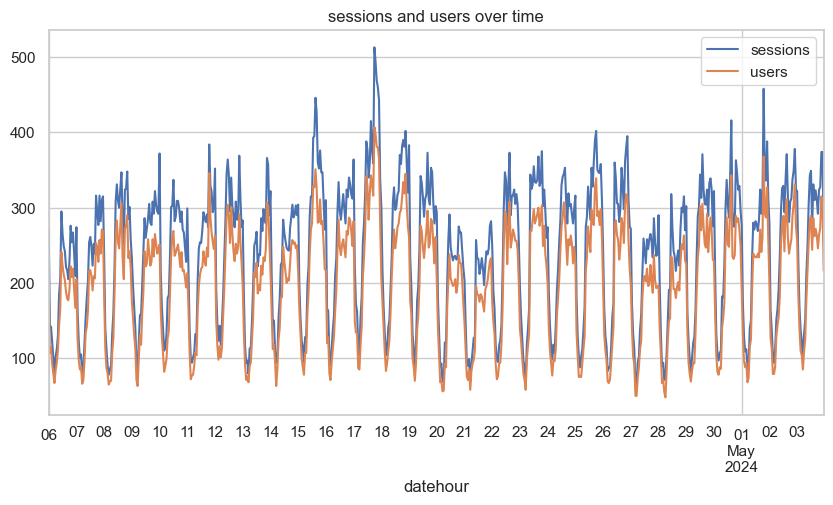

In [16]:
plt.figure(figsize=(10,5))
df.groupby("datehour")[["sessions","users"]].sum().plot(ax=plt.gca())
plt.title("sessions and users over time")
plt.show()

#total users by channel

C:\Users\Acer\AppData\Local\Temp\ipykernel_7956\3750699903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df,x="channel group",y="users",estimator = np.sum,palette="magma")


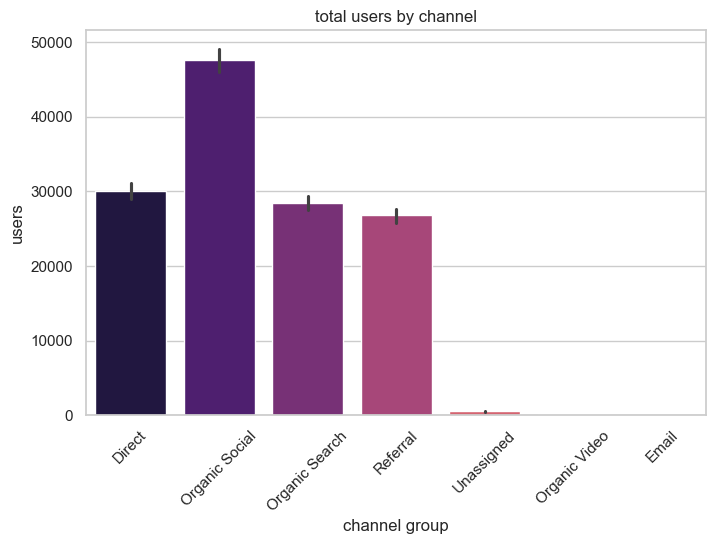

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(data = df,x="channel group",y="users",estimator = np.sum,palette="magma")
plt.title("total users by channel")
plt.xticks(rotation = 45)
plt.show()

engagement rate distrubation by channel

C:\Users\Acer\AppData\Local\Temp\ipykernel_7956\1280869597.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df,x="channel group",y="Engagement rate",palette="viridis")


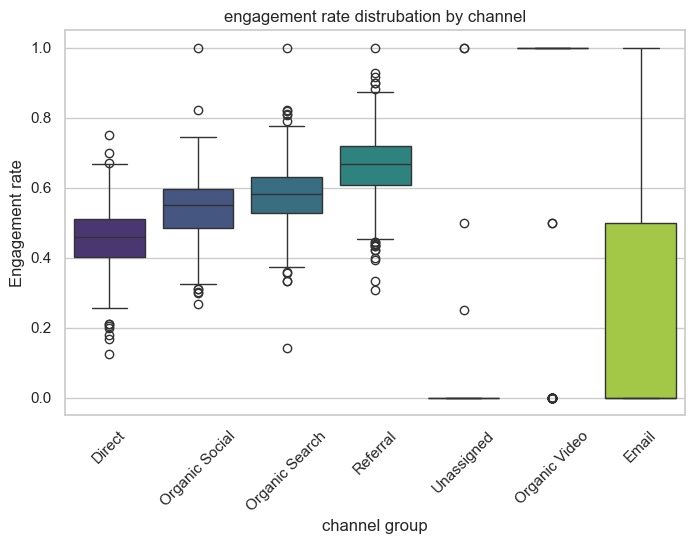

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(data = df,x="channel group",y="Engagement rate",palette="viridis")
plt.title("engagement rate distrubation by channel")
plt.xticks(rotation = 45)
plt.show()

engaged vs non engaged sessions

In [37]:
session_df = df.groupby("channel group")[["sessions","Engaged sessions"]].sum().reset_index()
session_df["non engeged"] = session_df["sessions"]-session_df["Engaged sessions"]
session_df_melted = session_df.melt(id_vars="channel group", value_vars=["Engaged sessions","non engeged"])

<function matplotlib.pyplot.show(close=None, block=None)>

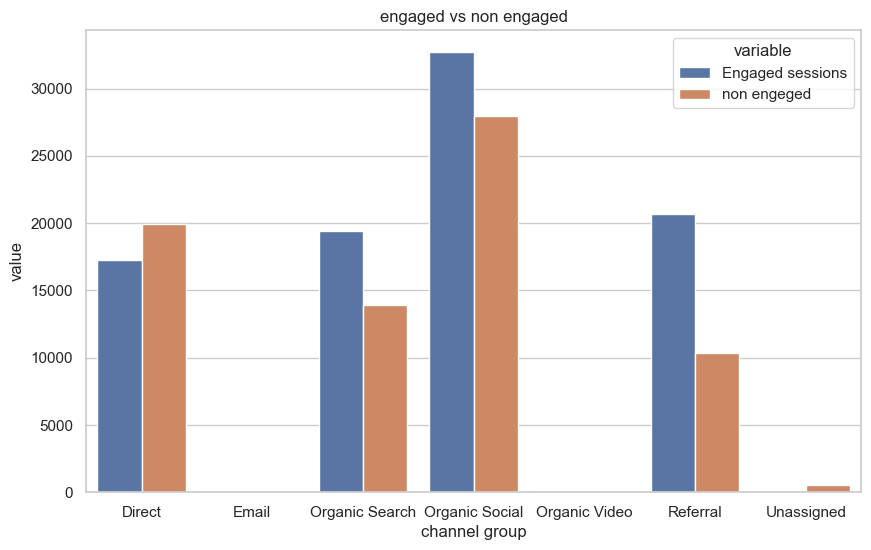

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(data =session_df_melted,x="channel group",y = "value",hue="variable")
plt.title("engaged vs non engaged")
plt.show

traffic by hour and channel

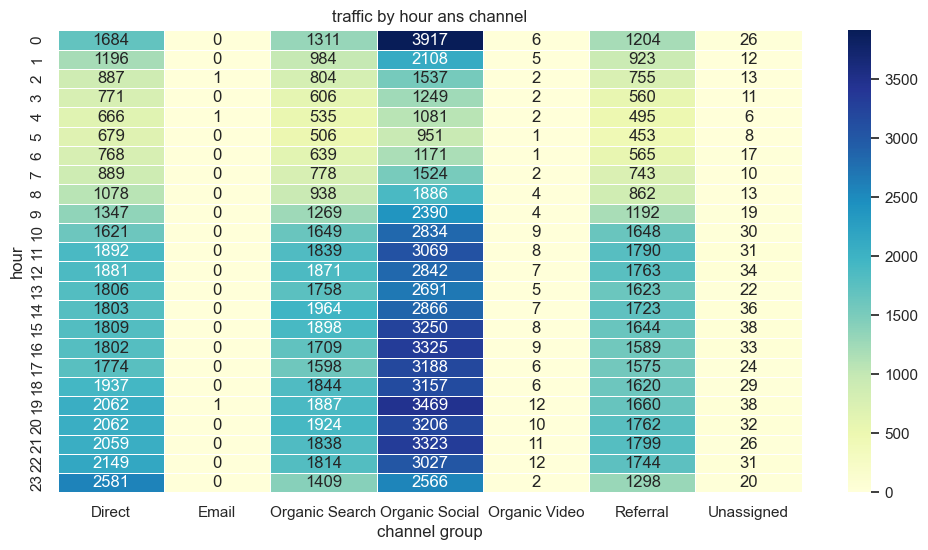

In [42]:
heatmap_data = df.groupby(["hour","channel group"])["sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data,cmap="YlGnBu",linewidth=.5,annot=True,fmt=".0f")
plt.title("traffic by hour ans channel")
plt.show()

engagement rate vs sessions overtime

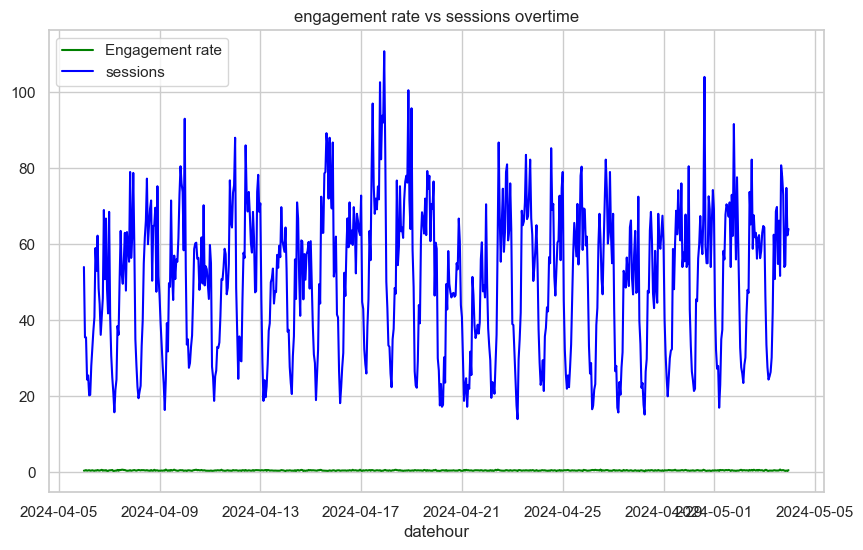

In [45]:
df_plot = df.groupby("datehour")[["Engagement rate","sessions"]].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(df_plot["datehour"],df_plot["Engagement rate"],label="Engagement rate",color="green")
plt.plot(df_plot["datehour"],df_plot["sessions"],label="sessions",color="blue")
plt.title("engagement rate vs sessions overtime")
plt.xlabel("datehour")
plt.legend()

END